In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

WATERMARKING CHAPTER TABLES

In [4]:
def clean(file, exceed=3):
	df = pd.read_csv(file)
	cp = pd.read_csv(file)
	cp['num_encr'] = df['Encrypted layer'].apply(lambda x: len(str(x).split(',')))
	cp = cp.drop(cp[cp.num_encr >= exceed].index)

	return cp


def meann(df):
	mean_wm = df.groupby('server_client_split')['trained wm_acc'].mean()
	mean_test = df.groupby('server_client_split')['trained test_acc'].mean()
	return mean_wm, mean_test

In [ ]:
digit_file = "digit_nnlock_textoverlay.csv"
d = clean(digit_file)
# print(d)
# d.to_csv("digit_nnlock_textoverlay_75.csv", index=False)

mean_wm, mean_test = meann(d)
print(mean_wm)
print()
print(mean_test)


In [ ]:
digit_file = "digit_nnlock_noise.csv"
d = clean(digit_file)
# print(d)
# d.to_csv("digit_nnlock_textoverlay_75.csv", index=False)

mean_wm, mean_test = meann(d)
print(mean_wm)
print()
print(mean_test)

In [ ]:
digit_file = "digit_nnlock_unrel.csv"
d = clean(digit_file)
# print(d)
# d.to_csv("digit_nnlock_textoverlay_75.csv", index=False)

mean_wm, mean_test = meann(d)
print(mean_wm)
print()
print(mean_test)

In [ ]:
fashion_file = "fashion_nnlock_textoverlay.csv"
f = clean(fashion_file)

mean_wm, mean_test = meann(f)
print(mean_wm)
print()
print(mean_test)

In [ ]:
fashion_file = "fashion_nnlock_noise.csv"
f = clean(fashion_file)

mean_wm, mean_test = meann(f)
print(mean_wm)
print()
print(mean_test)

In [ ]:
fashion_file = "fashion_nnlock_unrel.csv"
f = clean(fashion_file)

mean_wm, mean_test = meann(f)
print(mean_wm)
print()
print(mean_test)

In [ ]:
cifar10_file = "cifar10_nnlock_textoverlay.csv"
c = clean(cifar10_file, 5)
# print(d)
# d.to_csv("digit_nnlock_textoverlay_75.csv", index=False)

mean_wm, mean_test = meann(c)
print(mean_wm)
print()
print(mean_test)


In [ ]:
cifar10_file = "cifar10_nnlock_noise.csv"
c = clean(cifar10_file, 5)
# print(d)
# d.to_csv("digit_nnlock_textoverlay_75.csv", index=False)

mean_wm, mean_test = meann(c)
print(mean_wm)
print()
print(mean_test)


In [ ]:
cifar10_file = "cifar10_nnlock_unrel.csv"
c = clean(cifar10_file, 5)
# print(d)
# d.to_csv("digit_nnlock_textoverlay_75.csv", index=False)

mean_wm, mean_test = meann(c)
print(mean_wm)
print()
print(mean_test)

QUANTIZATION CHAPTER TABLES

In [ ]:
def quant(df):
	quant_wm = df.groupby('server_client_split')['quantized wm_acc'].mean()
	quant_test = df.groupby('server_client_split')['quantized test_acc'].mean()
	df['quant-trained wm_acc'] = df['quantized wm_acc'] - df['trained wm_acc']
	df['quant-trained test_acc'] = df['quantized test_acc'] - df['trained test_acc']
	wm_diff = df.groupby('server_client_split')['quant-trained wm_acc'].mean()
	test_diff = df.groupby('server_client_split')['quant-trained test_acc'].mean()

	return quant_wm, quant_test, wm_diff, test_diff

In [ ]:
def into_latex(df, splits=[0.2, 0.4, 0.5, 0.6, 0.8]):
	quant_wm, quant_test, wm_diff, test_diff = quant(df)
	for i in range(len(splits)):
		each_split = f"& {splits[i]:.1f} & {quant_wm.iloc[i]:.2f} & {wm_diff.iloc[i]:.2f} & {quant_test.iloc[i]:.2f}  & {test_diff.iloc[i]:.2f} \\\\"
		print(each_split)

In [ ]:
digit_file = "digit_nnlock_textoverlay.csv"
d = clean(digit_file, 3)

quant_wm, quant_test, wm_diff, test_diff = quant(d)
print(quant_wm)
print(wm_diff)
print()
print(quant_test)
print(test_diff)


In [ ]:
digit_file = "digit_nnlock_noise.csv"
d = clean(digit_file, 3)

print(into_latex(d))

In [ ]:
digit_file = "digit_nnlock_unrel.csv"
d = clean(digit_file, 3)

print(into_latex(d))

In [ ]:
fashion_file = "fashion_nnlock_textoverlay.csv"
f = clean(fashion_file, 3)

print(into_latex(f))

In [ ]:
fashion_file = "fashion_nnlock_noise.csv"
f = clean(fashion_file, 3)

print(into_latex(f))

In [ ]:
fashion_file = "fashion_nnlock_unrel.csv"
f = clean(fashion_file, 3)

print(into_latex(f))

In [ ]:
cifar_file = "cifar10_nnlock_textoverlay.csv"
c = clean(cifar_file, 3)

print(into_latex(c, [0.5, 0.6, 0.8]))

In [ ]:
cifar_file = "cifar10_nnlock_noise.csv"
c = clean(cifar_file, 3)

print(into_latex(c, [0.5, 0.6, 0.8]))

WATERMARK PRESERVATION

In [ ]:
import pandas as pd
import ast

def comp(df, locked_df, wm=0, spls=[0.2, 0.4, 0.5, 0.6, 0.8]):
	# print(df)
	wms = ['textoverlay', 'noise', 'unrelated']
	count = {}
	bms = {}
	under = {}
	good_locked = []
	locked_df['decrypted wm_acc'] = locked_df['decrypted wm_acc'].astype('float32')
	# locked_df['Encrypted layer'] = pd.eval(locked_df['Encrypted layer'])
	for s in spls:
		under[str(s)] = []
		# print(df.loc[(df['server_client_split'] == s) & (df['trig_type'] == wms[wm])])
		temp = df.loc[(df['server_client_split'] == s) & (df['trig_type'] == wms[wm]), 'incre_wm'].item()
		benchmark = ast.literal_eval(temp)[1] * 100
		# benchmark = 62
		# print(benchmark < 48.0, benchmark)
		count[str(s)] = len(locked_df.loc[(locked_df['server_client_split'] == s) & (locked_df['decrypted wm_acc'] >= benchmark)])
		# len(locked_df[(locked_df['trigger'] == wms[wm])  & (locked_df['server_client_split'] == s) & (locked_df['decrypted wm_acc'] >= benchmark)])
		bms[str(s)] = benchmark
		good_locked.append(locked_df.loc[(locked_df['server_client_split'] == s) & (locked_df['decrypted wm_acc'] >= benchmark), 'Encrypted layer'].values)
		# under[str(s)].append(locked_df.loc[(locked_df['server_client_split'] == s) & (locked_df['decrypted wm_acc'] < benchmark), 'Encrypted layer'])
		# under[str(s)].append(locked_df.loc[(locked_df['trigger'] == wms[wm])  & (locked_df['server_client_split'] == s) & (locked_df['decrypted wm_acc'] < benchmark), 'Encrypted layer'])
	return count, bms, good_locked


def bad_lock(all, good):
	c = []
	for b in all:
		c.append(list(b))
	bad = []
	for i in range(len(c)):
		if c[i] not in good:
			bad.append(c[i])
	return bad


In [ ]:
# df = pd.read_csv('/Users/limxinyi/Desktop/Year 4/fyp/digit_incre_non.csv')
# locked_df = clean('/Users/limxinyi/Desktop/Year 4/fyp/csv/digit_nnlock_textoverlay.csv', exceed=3) 
# count, bms, good = comp(df, locked_df, 0) #{'0.2': 14, '0.4': 14, '0.5': 14, '0.6': 14, '0.8': 14}
# print(lock_worse(df, locked_df, 0))
# locked_df = clean('/Users/limxinyi/Desktop/Year 4/fyp/digit_nnlock_noise.csv', exceed=3) #25
# count, bms, good = comp(df, locked_df, 1) #{'0.2': 5, '0.4': 5, '0.5': 5, '0.6': 5, '0.8': 5}
# locked_df = clean('/Users/limxinyi/Desktop/Year 4/fyp/digit_nnlock_unrel.csv', exceed=3) #75
# count, bms, good = comp(df, locked_df, 2) #{'0.2': 15, '0.4': 15, '0.5': 15, '0.6': 15, '0.8': 15}


# df = pd.read_csv('/Users/limxinyi/Desktop/Year 4/fyp/fashion_incre_non.csv')
# locked_df = clean('/Users/limxinyi/Desktop/Year 4/fyp/csv/fashion_nnlock_textoverlay.csv', exceed=3) #25
# count, bms, good = comp(df, locked_df, 0) #{'0.2': 5, '0.4': 5, '0.5': 5, '0.6': 5, '0.8': 5} 
# print(lock_worse(df, locked_df, 0))
# locked_df = clean('/Users/limxinyi/Desktop/Year 4/fyp/fashion_nnlock_noise.csv', exceed=3) #60
# print(comp(df, locked_df, 1)) #{'0.2': 12, '0.4': 12, '0.5': 12, '0.6': 12, '0.8': 12}
# print(lock_worse(df, locked_df, 1))
# locked_df = clean('/Users/limxinyi/Desktop/Year 4/fyp/fashion_nnlock_unrel.csv', exceed=3) #65
# count, bms, good =  comp(df, locked_df, 2) #{'0.2': 13, '0.4': 13, '0.5': 13, '0.6': 13, '0.8': 13}


df = pd.read_csv('/Users/limxinyi/Desktop/Year 4/fyp/cifar10_incre_nolock.csv')
locked_df = clean('/Users/limxinyi/Desktop/Year 4/fyp/cifar10_nnlock_textoverlay.csv', exceed=5) #25
count, bms, good = comp(df, locked_df, 0, [0.6]) #{'0.2': 5, '0.4': 5, '0.5': 5, '0.6': 5, '0.8': 5} 
# print(lock_worse(df, locked_df, 0))
# locked_df = clean('/Users/limxinyi/Desktop/Year 4/fyp/fashion_nnlock_noise.csv', exceed=5) #60
# print(comp(df, locked_df, 1, [0.5, 0.6, 0.8])) #{'0.2': 12, '0.4': 12, '0.5': 12, '0.6': 12, '0.8': 12}
# print(lock_worse(df, locked_df, 1))
# locked_df = clean('/Users/limxinyi/Desktop/Year 4/fyp/fashion_nnlock_unrel.csv', exceed=5) #65
# count, bms, good =  comp(df, locked_df, 2, [0.5, 0.6, 0.8]) #{'0.2': 13, '0.4': 13, '0.5': 13, '0.6': 13, '0.8': 13}

print(count)
print(bms)
print(good)

In [ ]:
g0 = good[0].tolist()
a = []
for p in g0:
	a.append(ast.literal_eval(p))
print(a)

In [ ]:
tmp = [[0], [1], [4], [5], [6], [10], [12], [14], [0, 1], [0, 4], [0, 5], [0, 6], [0, 10], [0, 12], [0, 14], [1, 4], [1, 5], [1, 6], [1, 10], [1, 12], [1, 14], [4, 5], [4, 6], [4, 10], [4, 12], [4, 14], [5, 6], [5, 10], [5, 12], [5, 14], [6, 10], [6, 12], [6, 14], [10, 12], [10, 14], [12, 14], [0, 1, 4], [0, 1, 5], [0, 1, 6], [0, 1, 10], [0, 1, 12], [0, 1, 14], [0, 4, 5], [0, 4, 6], [0, 4, 10], [0, 4, 12], [0, 4, 14], [0, 5, 6], [0, 5, 10], [0, 5, 12], [0, 5, 14], [0, 6, 10], [0, 6, 12], [0, 6, 14], [0, 10, 12], [0, 10, 14], [0, 12, 14], [1, 4, 5], [1, 4, 6], [1, 4, 10], [1, 4, 12], [1, 4, 14], [1, 5, 6], [1, 5, 10], [1, 5, 12], [1, 5, 14], [1, 6, 10], [1, 6, 12], [1, 6, 14], [1, 10, 12], [1, 10, 14], [1, 12, 14], [4, 5, 6], [4, 5, 10], [4, 5, 12], [4, 5, 14], [4, 6, 10], [4, 6, 12], [4, 6, 14], [4, 10, 12], [4, 10, 14], [4, 12, 14], [5, 6, 10], [5, 6, 12], [5, 6, 14], [5, 10, 12], [5, 10, 14], [5, 12, 14], [6, 10, 12], [6, 10, 14], [6, 12, 14], [10, 12, 14], [0, 1, 4, 5], [0, 1, 4, 6], [0, 1, 4, 10], [0, 1, 4, 12], [0, 1, 4, 14], [0, 1, 5, 6], [0, 1, 5, 10], [0, 1, 5, 12], [0, 1, 5, 14], [0, 1, 6, 10], [0, 1, 6, 12], [0, 1, 6, 14], [0, 1, 10, 12], [0, 1, 10, 14], [0, 1, 12, 14], [0, 4, 5, 6], [0, 4, 5, 10], [0, 4, 5, 12], [0, 4, 5, 14], [0, 4, 6, 10], [0, 4, 6, 12], [0, 4, 6, 14], [0, 4, 10, 12], [0, 4, 10, 14], [0, 4, 12, 14], [0, 5, 6, 10], [0, 5, 6, 12], [0, 5, 6, 14], [0, 5, 10, 12], [0, 5, 10, 14], [0, 5, 12, 14], [0, 6, 10, 12], [0, 6, 10, 14], [0, 6, 12, 14], [0, 10, 12, 14], [1, 4, 5, 6], [1, 4, 5, 10], [1, 4, 5, 12], [1, 4, 5, 14], [1, 4, 6, 10], [1, 4, 6, 12], [1, 4, 6, 14], [1, 4, 10, 12], [1, 4, 10, 14], [1, 4, 12, 14], [1, 5, 6, 10], [1, 5, 6, 12], [1, 5, 6, 14], [1, 5, 10, 12], [1, 5, 10, 14], [1, 5, 12, 14], [1, 6, 10, 12], [1, 6, 10, 14], [1, 6, 12, 14], [1, 10, 12, 14], [4, 5, 6, 10], [4, 5, 6, 12], [4, 5, 6, 14], [4, 5, 10, 12], [4, 5, 10, 14], [4, 5, 12, 14], [4, 6, 10, 12], [4, 6, 10, 14], [4, 6, 12, 14], [4, 10, 12, 14], [5, 6, 10, 12], [5, 6, 10, 14], [5, 6, 12, 14], [5, 10, 12, 14], [6, 10, 12, 14]]
bad_lock(tmp, a)

In [ ]:
good[0].tolist(), "\n", good[1].tolist(),"\n",  good[2].tolist() #,"\n",  good[3].tolist() ,"\n",  good[4].tolist()


TEST PRESERATION TOO

In [14]:
import pandas as pd
import ast

def comp(df, locked_df, wm=0):
	# print(df)
	wms = ['textoverlay', 'noise', 'unrelated']
	locked_df['wm_diff'] = locked_df['wm_diff'].astype('float32')
	locked_df['test_diff'] = locked_df['test_diff'].astype('float32')
	locked_df['decrypted test_acc'] = locked_df['decrypted test_acc'].astype('float32')
	locked_df['decrypted wm_acc'] = locked_df['decrypted wm_acc'].astype('float32')
	# locked_df['Encrypted layer'] = pd.eval(locked_df['Encrypted layer'])
	enc = locked_df.loc[(locked_df['server_client_split'] == 0.5) & (locked_df['test_diff'] >= -1) & (locked_df['wm_diff'] >= -1) & (locked_df['wm_diff'] <= 1) & (locked_df['decrypted test_acc'] >= 65.5), 'Encrypted layer'].values
	wm = locked_df.loc[(locked_df['server_client_split'] == 0.5) & (locked_df['test_diff'] >= -1) & (locked_df['wm_diff'] >= -1) & (locked_df['wm_diff'] <= 1) & (locked_df['decrypted test_acc'] >= 65.5) , 'decrypted wm_acc'].values
	tt = locked_df.loc[(locked_df['server_client_split'] == 0.5) & (locked_df['test_diff'] >= -1) & (locked_df['wm_diff'] >= -1) & (locked_df['wm_diff'] <= 1) & (locked_df['decrypted test_acc'] >= 65.5) , 'decrypted test_acc'].values
	return enc, wm , tt

In [16]:
# df = pd.read_csv('/Users/limxinyi/Desktop/Year 4/fyp/digit_incre_non.csv')
# locked_df = clean('/Users/limxinyi/Desktop/Year 4/fyp/csv/digit_nnlock_textoverlay.csv', exceed=3) 
# count, bms, good = comp(df, locked_df, 0) #{'0.2': 14, '0.4': 14, '0.5': 14, '0.6': 14, '0.8': 14}
# print(lock_worse(df, locked_df, 0))
# locked_df = clean('/Users/limxinyi/Desktop/Year 4/fyp/digit_nnlock_noise.csv', exceed=3) #25
# count, bms, good = comp(df, locked_df, 1) #{'0.2': 5, '0.4': 5, '0.5': 5, '0.6': 5, '0.8': 5}
# locked_df = clean('/Users/limxinyi/Desktop/Year 4/fyp/digit_nnlock_unrel.csv', exceed=3) #75
# count, bms, good = comp(df, locked_df, 2) #{'0.2': 15, '0.4': 15, '0.5': 15, '0.6': 15, '0.8': 15}


# df = pd.read_csv('/Users/limxinyi/Desktop/Year 4/fyp/fashion_incre_non.csv')
# locked_df = clean('/Users/limxinyi/Desktop/Year 4/fyp/csv/fashion_nnlock_textoverlay.csv', exceed=3) #25
# count, bms, good = comp(df, locked_df, 0) #{'0.2': 5, '0.4': 5, '0.5': 5, '0.6': 5, '0.8': 5} 
# print(lock_worse(df, locked_df, 0))
# locked_df = clean('/Users/limxinyi/Desktop/Year 4/fyp/fashion_nnlock_noise.csv', exceed=3) #60
# count, bms, good = comp(df, locked_df, 1) #{'0.2': 12, '0.4': 12, '0.5': 12, '0.6': 12, '0.8': 12}
# print(lock_worse(df, locked_df, 1))
# locked_df = clean('/Users/limxinyi/Desktop/Year 4/fyp/fashion_nnlock_unrel.csv', exceed=3) #65
# count, bms, good =  comp(df, locked_df, 2) #{'0.2': 13, '0.4': 13, '0.5': 13, '0.6': 13, '0.8': 13}


df = pd.read_csv('/Users/limxinyi/Desktop/Year 4/fyp/cifar10_incre_nolock.csv')
# locked_df = clean('/Users/limxinyi/Desktop/Year 4/fyp/cifar10_nnlock_textoverlay.csv', exceed=5) #25
# count, bms, good = comp(df, locked_df, 0) #{'0.2': 5, '0.4': 5, '0.5': 5, '0.6': 5, '0.8': 5} 
# print(lock_worse(df, locked_df, 0))
# locked_df = clean('/Users/limxinyi/Desktop/Year 4/fyp/fashion_nnlock_noise.csv', exceed=5) #60
# count, bms, good =  comp(df, locked_df, 1) #{'0.2': 12, '0.4': 12, '0.5': 12, '0.6': 12, '0.8': 12}
# print(lock_worse(df, locked_df, 1))
locked_df = clean('/Users/limxinyi/Desktop/Year 4/fyp/cifar10_nnlock_unrel.csv', exceed=5) #65
count, bms, good =  comp(df, locked_df, 2) #{'0.2': 13, '0.4': 13, '0.5': 13, '0.6': 13, '0.8': 13}

print(count)
print(bms)
print(good)

# s = ''
# for i in range(len(count)):
# 	s += '&'
# 	s += f"{ str(count[i])} & {bms[i]} & {good[i]} \\\\"
# print(s)

['[4, 5, 12, 14]' '[0, 6, 14]' '[1, 6, 12]' '[1, 10, 12]']
[91.5 88.5 97.5 86. ]
[65.97 65.81 65.61 65.88]


In [11]:
df = pd.read_csv('/Users/limxinyi/Desktop/Year 4/fyp/fashion_incre_non.csv')
locked_df = clean('/Users/limxinyi/Desktop/Year 4/fyp/fashion_nnlock_unrel.csv', exceed=3) #65
count, bms, good =  comp(df, locked_df, 2) #{'0.2': 13, '0.4': 13, '0.5': 13, '0.6': 13, '0.8': 13}


print(count)
print(bms)
print(good)


['[2, 11]' '[0, 2]']
[91.5 89.5]
[83.9  83.27]


PLOT PARAMS

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def line(c, n, u):
	content = c[c['server_client_split'] == 0.5]
	content['non-locked parameters'] = c['non-locked parameters'].astype('int')
	content['wm_diff'] = c['wm_diff'].astype('float32')
	content.sort_values('non-locked parameters', inplace=True)
	noise = n[n['server_client_split'] == 0.5]
	noise['non-locked parameters'] = n['non-locked parameters'].astype('int')
	noise['wm_diff'] = n['wm_diff'].astype('float32')
	noise.sort_values('non-locked parameters', inplace=True)
	unrel = u[u['server_client_split'] == 0.5]
	unrel['non-locked parameters'] = u['non-locked parameters'].astype('int')
	unrel['wm_diff'] = u['wm_diff'].astype('float32')
	unrel.sort_values('non-locked parameters', inplace=True)
	plt.figure(figsize=(12,4), edgecolor='y').tight_layout()
	for spine in plt.axes().spines.values():
		spine.set_edgecolor('tab:gray')
	plt.plot(content['non-locked parameters'].astype('str'), content['wm_diff'], 'g',label='$T_{content}$')
	plt.plot(noise['non-locked parameters'].astype('str'), noise['wm_diff'], 'b',label='$T_{noise}$')
	plt.plot(unrel['non-locked parameters'].astype('str'), unrel['wm_diff'], 'r',label='$T_{unrelated}$')
	plt.xlabel('Number of non-encrypted parameters')
	plt.ylabel('Difference in watermark accuracy\n after incremental learning (%)')
	plt.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
	minn = min(content['non-locked parameters'].min(), noise['non-locked parameters'].min(), unrel['non-locked parameters'].min())
	maxx = max(content['non-locked parameters'].max(), noise['non-locked parameters'].max(), unrel['non-locked parameters'].max())
	plt.xticks(unrel['non-locked parameters'].astype('str')[::4], rotation=70)
	plt.xticks( rotation=70)
	plt.margins(x=0) 
	plt.legend(loc='lower right')
	# plt.axes().set_xticks(plt.axes().get_xticks()[::4])
	# plt.locator_params(axis='x', nbins=20)




	plt.show()

/var/folders/bb/p6m9qrzd7lzclcj5b7v_c__c0000gn/T/ipykernel_18812/3304510886.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['non-locked parameters'] = c['non-locked parameters'].astype('int')
/var/folders/bb/p6m9qrzd7lzclcj5b7v_c__c0000gn/T/ipykernel_18812/3304510886.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['wm_diff'] = c['wm_diff'].astype('float32')
/var/folders/bb/p6m9qrzd7lzclcj5b7v_c__c0000gn/T/ipykernel_18812/3304510886.py:10: SettingWithCopyWarning: 
A value is trying to

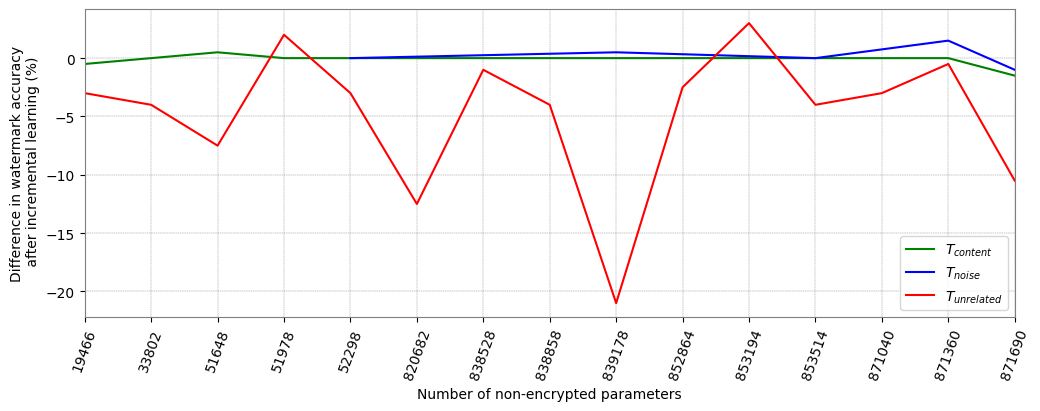

In [5]:
content = clean('/Users/limxinyi/Desktop/Year 4/fyp/csv/digit_nnlock_textoverlay.csv', exceed=3)
noise = clean('/Users/limxinyi/Desktop/Year 4/fyp/digit_nnlock_noise.csv', exceed=3) 
unrel = clean('/Users/limxinyi/Desktop/Year 4/fyp/digit_nnlock_unrel.csv', exceed=3) 

line(content, noise, unrel)

/var/folders/bb/p6m9qrzd7lzclcj5b7v_c__c0000gn/T/ipykernel_18812/3304510886.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['non-locked parameters'] = c['non-locked parameters'].astype('int')
/var/folders/bb/p6m9qrzd7lzclcj5b7v_c__c0000gn/T/ipykernel_18812/3304510886.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['wm_diff'] = c['wm_diff'].astype('float32')
/var/folders/bb/p6m9qrzd7lzclcj5b7v_c__c0000gn/T/ipykernel_18812/3304510886.py:10: SettingWithCopyWarning: 
A value is trying to

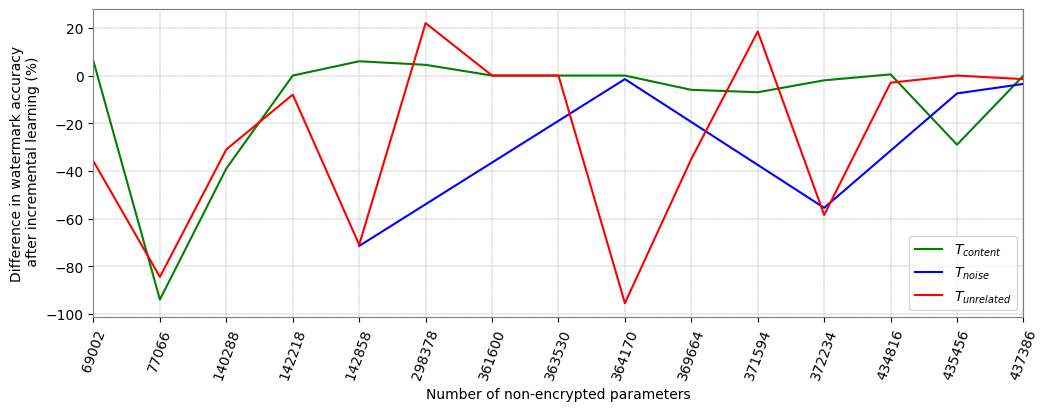

In [6]:
content = pd.read_csv('/Users/limxinyi/Desktop/Year 4/fyp/fashion_nnlock_textoverlay.csv')
noise = clean('/Users/limxinyi/Desktop/Year 4/fyp/fashion_nnlock_noise.csv', exceed=3) 
unrel = clean('/Users/limxinyi/Desktop/Year 4/fyp/fashion_nnlock_unrel.csv', exceed=3) 

line(content, noise, unrel)

/var/folders/bb/p6m9qrzd7lzclcj5b7v_c__c0000gn/T/ipykernel_18812/396597845.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['non-locked parameters'] = c['non-locked parameters'].astype('int')
/var/folders/bb/p6m9qrzd7lzclcj5b7v_c__c0000gn/T/ipykernel_18812/396597845.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['wm_diff'] = c['wm_diff'].astype('float32')
/var/folders/bb/p6m9qrzd7lzclcj5b7v_c__c0000gn/T/ipykernel_18812/396597845.py:10: SettingWithCopyWarning: 
A value is trying to be

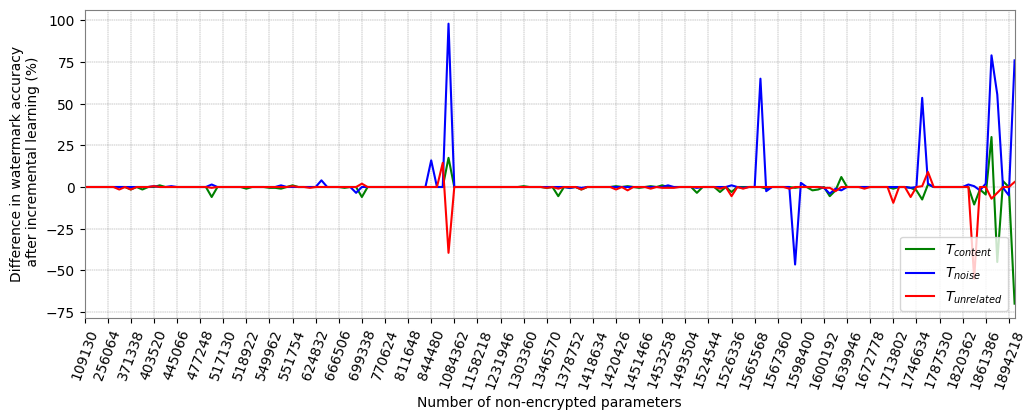

In [13]:
content = clean('/Users/limxinyi/Desktop/Year 4/fyp/cifar10_nnlock_textoverlay.csv', exceed=5)
noise = clean('/Users/limxinyi/Desktop/Year 4/fyp/cifar10_nnlock_noise.csv', exceed=5) 
unrel = clean('/Users/limxinyi/Desktop/Year 4/fyp/cifar10_nnlock_unrel.csv', exceed=5) 

line(content, noise, unrel)

In [ ]:
def wm_pre(df, benchmark, threshold=80):
	lock_above_wm = len(df[df['decrypted wm_acc'] >= benchmark])
	non_above_wm = len(df[df['non-decr wm_acc'] >= benchmark])
	lock_mid_wm = ((df['decrypted wm_acc'] < benchmark) & (df['decrypted wm_acc']>= threshold)).sum()
	non_mid_wm = ((df['non-decr wm_acc'] < benchmark) & (df['non-decr wm_acc'] >= threshold)).sum()
	lock_below_wm = len(df[df['decrypted wm_acc'] < threshold])
	non_below_wm = len(df[df['non-decr wm_acc'] < threshold])
	
	return lock_above_wm, non_above_wm, lock_mid_wm, non_mid_wm, lock_below_wm, non_below_wm

def into_latex(df, benchmark, threshold=80):
	lock_above_wm, non_above_wm, lock_mid_wm, non_mid_wm, lock_below_wm, non_below_wm = wm_pre(df, benchmark, threshold)
	ltx = f"& $x>={benchmark}$ & {lock_above_wm} & {non_above_wm} \\\\ & ${threshold}<=x<{benchmark}$  & {lock_mid_wm} & {non_mid_wm} \\\\ & $x<{threshold}$  & {lock_below_wm} & {non_below_wm} \\\\"
	print(ltx)

In [ ]:
digit_file = "digit_nnlock_textoverlay.csv"
d = clean(digit_file, 3)

print(into_latex(d, 98.33 ,80))

In [ ]:
digit_file = "digit_nnlock_noise.csv"
d = clean(digit_file, 3)

print(into_latex(d, 98 ,80))

In [ ]:
fashion_file = "fashion_nnlock_textoverlay.csv"
f = clean(fashion_file, 3)

print(into_latex(d, 95.77 ,80))

In [ ]:
fashion_file = "fashion_nnlock_noise.csv"
f = clean(fashion_file, 3)

print(into_latex(d, 98.6 ,80))

In [ ]:
fashion_file = "fashion_nnlock_unrel.csv"
f = clean(fashion_file, 3)

print(into_latex(d, 98.6 ,80))

In [ ]:
cifar10_file = "cifar10_nnlock_textoverlay.csv"
c = clean(cifar10_file, 5)

print(into_latex(d, 90.69 ,80))

In [ ]:
cifar10_file = "cifar10_nnlock_noise.csv"
c = clean(cifar10_file, 5)

print(into_latex(d, 97.41 ,80))

In [ ]:
def same(file):
	df = pd.read_csv(file)
	cp = pd.read_csv(file)
	cp['diff_wm'] = np.where((df['encrypted wm_acc'] != df['quantized wm_acc']))
	cp['diff_test'] = np.where((df['encrypted test_acc'] != df['quantized test_acc']))
	return cp

In [ ]:
fashion_file = "fashion_nnlock_textoverlay.csv"
f = same(fashion_file)
print(f)

In [ ]:
fashion_file = "fashion_nnlock_text_compare.csv"
fashion_df = pd.read_csv(fashion_file)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

f_df = fashion_df[['Encrypted layer', 'server epochs', 'wm_diff']].sort_values(by='server epochs')

plt.plot(f_df['server epochs'], f_df['wm_diff'], 'xb-')
plt.legend()
plt.show()

In [ ]:
digit_file = "digit_nnlock_text_compare.csv"
digit_df = pd.read_csv(digit_file)

fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

d_df = digit_df[['Encrypted layer', 'server epochs', 'wm_diff']]

for key, grp in d_df.groupby(['Encrypted layer']):
  grp.sort_values(by='server epochs', inplace=True)
  ax.plot(grp['server epochs'], grp['wm_diff'], label=key)

ax.legend()
plt.show()


In [ ]:
cifar10_file = "cifar10_nnlock_text_compare.csv"
cifar10_df = pd.read_csv(cifar10_file)

fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

c10_df = cifar10_df[['Encrypted layer', 'server epochs', 'wm_diff']]

for key, grp in c10_df.groupby(['Encrypted layer']):
  grp.sort_values(by='server epochs', inplace=True)
  ax.plot(grp['server epochs'], grp['wm_diff'], label=key)

ax.legend()
plt.show()

In [ ]:
def wm_mean(data, wm):
	file = f"{data}_nnlock_{wm}.csv"
	df = pd.read_csv(file)
	df_wm = df[['server_client_split', 'trained wm_acc', 'trained test_acc']]
	df_wm = df_wm.groupby('server_client_split').mean()
	df_wm = df_wm.round({"trained wm_acc":2, "trained test_acc":2}) 

	df_wm.to_csv(f'{data}_{wm}_mean.csv')
	return df_wm


In [ ]:
wm_mean('digit', 'textoverlay')
wm_mean('digit', 'noise')
wm_mean('fashion', 'textoverlay')
wm_mean('fashion', 'noise')

In [ ]:
c = wm_mean('cifar10', 'textoverlay')

In [ ]:
c

ALL LOCKED

In [ ]:
import pandas as pd
import ast

def comp(df, locked_df, wm=0, spls=[0.2, 0.4, 0.5, 0.6, 0.8]):
	wms = ['textoverlay', 'noise', 'unrelated']
	locked_max_wm = locked_df.groupby('server_client_split')['decrypted wm_acc'].max()
	locked_max_test = locked_df.groupby('server_client_split')['decrypted test_acc'].max()
	df_min_wm = df.groupby('server_client_split')['trained wm_acc'].min()
	df_min_test = df.groupby('server_client_split')['trained test_acc'].min()
	
	return locked_max_wm, locked_max_test, df_min_wm, df_min_test


df = pd.read_csv('/Users/limxinyi/Desktop/Year 4/fyp/cifar10_incre_nolock.csv')
locked_df = clean('/Users/limxinyi/Desktop/Year 4/fyp/cifar10_nnlock_textoverlay.csv', exceed=5) #25
count, bms, good = comp(df, locked_df, 0, [0.6])

In [ ]:
for each dataset:
	for each pre_train_to_incre_learn ratio:
		for i in range(1, len(lst_trainable_layers) //2 +1):
			encryption_combinations = combinations(lst_trainable_layers, i)
			# encrypt i layers from list of trainable layers for each combi in encryption_combinations:
			perform_experiment(layers_lock=combi)